# You Only Look Once 👀

## Installing Roboflow Library to Load the Data

In [1]:
!pip install roboflow

## Installing Yolo Library 

In [2]:
!pip install ultralytics

## Importing Required Libraries

In [3]:
import glob
import os
import random
import zipfile
import pandas as pd
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from ultralytics import YOLO
from roboflow import Roboflow



## Load The Data

In [4]:
rf = Roboflow(api_key="lwfvDzXdCDJmMGufTsNP")
project = rf.workspace("anoud-c3fkd").project("passenger-object-detection")
version = project.version(1)
dataset = version.download("yolov8", location="datasets")

loading Roboflow workspace...
loading Roboflow project...


## Exploratory Data Analysis

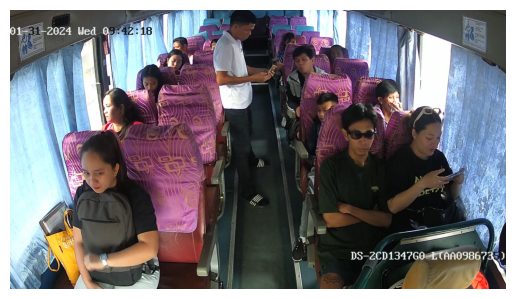

In [5]:
import glob

images = glob.glob("datasets/train/images/*")

random_image = random.choice(images)

img = cv2.imread(random_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

plt.imshow(img)
plt.axis('off')
plt.show()


In [6]:
train_images = glob.glob("datasets/train/images/*")
len(train_images)

4360

In [7]:
test_images = glob.glob("datasets/test/images/*")
len(test_images)

663

In [8]:
valid_images = glob.glob("datasets/valid/images/*")
len(valid_images)

1217

In [9]:
image_paths = glob.glob("datasets/train/images/**")
image_names = [img.split("/")[-1].split(".")[0] for img in image_paths]

label_paths = glob.glob("datasets/train/labels/*.txt")
label_names = [lbl.split("/")[-1].split(".")[0] for lbl in label_paths]

no_label_images = set(image_names) - set(label_names)

print(len(no_label_images))

0


## Training YOLOv8 Model

In [10]:
model = YOLO("yolov8n.pt")
model

model.train(data="/home/jupyter/datasets/data.yaml", epochs=50, imgsz=970, batch= -1)

New https://pypi.org/project/ultralytics/8.3.121 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.117 🚀 Python-3.10.16 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 14918MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jupyter/datasets/data.yaml, epochs=50, time=None, patience=100, batch=-1, imgsz=970, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning /home/jupyter/datasets/train/labels.cache... 4360 images, 5 backgrounds, 0 corrupt: 100%|██████████| 4360/4360 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 43, len(boxes) = 83811. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
AutoBatch: Computing optimal batch size for imgsz=992 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.57G total, 0.10G reserved, 0.06G allocated, 14.40G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output


     3011043       19.69         0.581         53.89         398.8        (1, 3, 992, 992)                    list
     3011043       39.37         0.988         21.47         157.2        (2, 3, 992, 992)                    list
     3011043       78.75         1.711         35.44         143.1        (4, 3, 992, 992)                    list
     3011043       157.5         2.978            60         147.2        (8, 3, 992, 992)                    list
     3011043         315         5.878         93.04         180.7       (16, 3, 992, 992)                    list
AutoBatch: Using batch-size 24 for CUDA:0 8.81G/14.57G (61%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 129.5±35.9 MB/s, size: 386.1 KB)


train: Scanning /home/jupyter/datasets/train/labels.cache... 4360 images, 5 backgrounds, 0 corrupt: 100%|██████████| 4360/4360 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 43, len(boxes) = 83811. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.5±0.7 ms, read: 101.9±34.9 MB/s, size: 359.2 KB)


val: Scanning /home/jupyter/datasets/valid/labels.cache... 1217 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1217/1217 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005625000000000001), 63 bias(decay=0.0)
Image sizes 992 train, 992 val
Using 4 dataloader workers
Logging results to runs/detect/train13
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      10.8G      1.372      1.199      1.138        526        992: 100%|██████████| 182/182 [01:43<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.98it/s]


                   all       1217      23826      0.851       0.79      0.856      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      10.4G      1.255     0.7644      1.074        629        992: 100%|██████████| 182/182 [01:41<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]


                   all       1217      23826      0.869      0.844      0.891      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      9.88G       1.25     0.7181      1.081        449        992: 100%|██████████| 182/182 [01:40<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]


                   all       1217      23826      0.906      0.869      0.919      0.574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      12.4G      1.199     0.6581      1.062        538        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]


                   all       1217      23826      0.917      0.878      0.934      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      11.7G      1.176     0.6261      1.054        373        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]


                   all       1217      23826      0.907      0.886      0.939      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      10.1G      1.162     0.6089      1.046        310        992: 100%|██████████| 182/182 [01:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all       1217      23826       0.92      0.882      0.943      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      12.8G      1.125      0.584      1.031        451        992: 100%|██████████| 182/182 [01:41<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.936      0.903      0.956      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      10.9G      1.116     0.5741       1.03        744        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.934      0.909      0.953      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      13.3G      1.101     0.5662      1.024        649        992: 100%|██████████| 182/182 [01:41<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]

                   all       1217      23826      0.929      0.913      0.956       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      11.5G       1.08     0.5507      1.016        349        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]

                   all       1217      23826      0.932      0.909      0.959      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50        11G       1.07     0.5395      1.015        425        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all       1217      23826      0.938      0.915      0.954      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]


                   all       1217      23826      0.944      0.923      0.968      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      11.9G      1.035     0.5179     0.9995        522        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]


                   all       1217      23826       0.95      0.933      0.966       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      11.9G      1.034     0.5142     0.9992        471        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]


                   all       1217      23826      0.933      0.926      0.955      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      11.6G       1.02      0.507     0.9939        492        992: 100%|██████████| 182/182 [01:39<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.947      0.934       0.97      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      10.6G      1.013     0.5043     0.9936        542        992: 100%|██████████| 182/182 [01:39<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.17it/s]


                   all       1217      23826      0.946      0.933      0.964      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      10.7G     0.9975     0.4922     0.9862        350        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all       1217      23826      0.949       0.93      0.969      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      11.1G     0.9994     0.4932     0.9875        631        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]

                   all       1217      23826      0.949      0.936      0.971      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      13.5G     0.9781      0.483     0.9809        602        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all       1217      23826      0.948      0.937      0.971      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      10.1G     0.9792     0.4819     0.9793        513        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]


                   all       1217      23826      0.953      0.932      0.973      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.33G     0.9728     0.4755     0.9791        665        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all       1217      23826      0.956      0.934      0.971      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      12.3G      0.969     0.4736     0.9762        438        992: 100%|██████████| 182/182 [01:39<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]


                   all       1217      23826      0.952      0.936      0.972      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      11.5G     0.9622     0.4685     0.9718        559        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]


                   all       1217      23826      0.954      0.941      0.974      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      11.2G     0.9514     0.4661      0.968        611        992: 100%|██████████| 182/182 [01:41<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]


                   all       1217      23826      0.959      0.945      0.974      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      12.3G     0.9449     0.4628     0.9664        419        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]


                   all       1217      23826       0.96      0.944      0.975      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      9.64G     0.9372     0.4564     0.9627        602        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all       1217      23826       0.96      0.944      0.975      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.4G     0.9365     0.4549     0.9651        578        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all       1217      23826      0.959      0.944      0.976      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.6G     0.9262     0.4481     0.9595        452        992: 100%|██████████| 182/182 [01:40<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]

                   all       1217      23826      0.957      0.947      0.978      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      11.2G     0.9266      0.449     0.9615        561        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]


                   all       1217      23826      0.959      0.945      0.978      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G     0.9142     0.4419     0.9556        590        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]


                   all       1217      23826      0.963       0.95      0.979      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      11.8G     0.9055     0.4385     0.9526        712        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.959      0.948      0.978      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      9.61G     0.9002     0.4344     0.9508        605        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]


                   all       1217      23826      0.962      0.948      0.979      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      12.7G     0.9021     0.4339     0.9522        536        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.97it/s]

                   all       1217      23826      0.962      0.949       0.98      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      13.1G     0.8942     0.4315     0.9491        482        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]

                   all       1217      23826      0.962      0.952       0.98      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      10.3G      0.892       0.43       0.95        483        992: 100%|██████████| 182/182 [01:40<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]

                   all       1217      23826      0.961       0.95      0.979      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      11.9G     0.8799     0.4245     0.9444        522        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.962       0.95      0.979      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      9.93G     0.8801     0.4234      0.946        512        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]


                   all       1217      23826      0.966      0.949      0.981      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      11.7G     0.8786     0.4226     0.9439        491        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]


                   all       1217      23826      0.963      0.954      0.981      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      12.3G     0.8748     0.4193     0.9429        527        992: 100%|██████████| 182/182 [01:40<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]


                   all       1217      23826      0.963      0.952       0.98       0.74
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.59G     0.8845     0.4077     0.9455        372        992: 100%|██████████| 182/182 [01:36<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all       1217      23826      0.962      0.953      0.981      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.37G      0.873     0.4002     0.9408        321        992: 100%|██████████| 182/182 [01:32<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]


                   all       1217      23826      0.965      0.952      0.982      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.42G     0.8634     0.3972     0.9394        334        992: 100%|██████████| 182/182 [01:32<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]

                   all       1217      23826      0.965      0.952       0.98      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       7.1G     0.8588     0.3941     0.9364        343        992: 100%|██████████| 182/182 [01:33<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]

                   all       1217      23826      0.964      0.952      0.981      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.31G      0.849     0.3888     0.9327        302        992: 100%|██████████| 182/182 [01:33<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]


                   all       1217      23826      0.961      0.954      0.981      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.39G     0.8422     0.3861     0.9284        268        992: 100%|██████████| 182/182 [01:32<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]

                   all       1217      23826      0.967      0.949      0.981      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.12G      0.836     0.3825     0.9289        233        992: 100%|██████████| 182/182 [01:32<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]

                   all       1217      23826      0.967      0.951      0.982      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.13G     0.8307     0.3804     0.9255        279        992: 100%|██████████| 182/182 [01:32<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]

                   all       1217      23826      0.965      0.954      0.982      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.35G     0.8254      0.378      0.924        233        992: 100%|██████████| 182/182 [01:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.12it/s]

                   all       1217      23826      0.966      0.955      0.982      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       7.4G     0.8228     0.3746     0.9252        334        992: 100%|██████████| 182/182 [01:32<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]

                   all       1217      23826      0.965      0.954      0.982      0.752



50 epochs completed in 1.562 hours.
Optimizer stripped from runs/detect/train13/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train13/weights/best.pt, 6.3MB

Validating runs/detect/train13/weights/best.pt...
Ultralytics 8.3.117 🚀 Python-3.10.16 torch-2.7.0+cu126 CUDA:0 (Tesla T4, 14918MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:16<00:00,  1.60it/s]


                   all       1217      23826      0.964      0.954      0.982      0.752
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train13


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd8fdd72050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:

results = pd.read_csv('runs/detect/train7/results.csv')



In [12]:
mAP50 = results['metrics/mAP50(B)']
mAP5095 = results['metrics/mAP50-95(B)']

last_mAP50 = mAP50.iloc[-1]
last_mAP5095 = mAP5095.iloc[-1]

print(f"Final mAP50: {last_mAP50:.3f}")
print(f"Final mAP50-95: {last_mAP5095:.3f}")



Final mAP50: 0.964
Final mAP50-95: 0.702


In [13]:
results = pd.read_csv('runs/detect/train7/results.csv') 
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,65.3534,1.47094,1.43672,1.11485,0.74429,0.21527,0.50162,0.26131,1.35122,2.10563,1.13843,0.000658,0.000658,0.000658
1,2,129.4650,1.28584,0.78936,1.02574,0.61036,0.57945,0.57008,0.31200,1.39396,1.44458,1.19788,0.001281,0.001281,0.001281
2,3,196.7810,1.26091,0.73990,1.02836,0.79251,0.72614,0.77116,0.41051,1.34735,1.05785,1.13864,0.001860,0.001860,0.001860
3,4,261.8780,1.23235,0.69531,1.02268,0.80956,0.75436,0.78860,0.36054,1.40785,1.15768,1.16185,0.001802,0.001802,0.001802
4,5,325.5910,1.19267,0.65917,1.00942,0.90376,0.84160,0.90659,0.52180,1.17750,0.72256,1.04258,0.001736,0.001736,0.001736
5,6,389.0790,1.16335,0.62482,0.99959,0.91017,0.86113,0.91158,0.55909,1.09117,0.67278,1.00836,0.001670,0.001670,0.001670
6,7,452.6550,1.13685,0.60351,0.98981,0.93090,0.85713,0.92791,0.58309,1.05395,0.58801,0.98982,0.001604,0.001604,0.001604
7,8,516.4980,1.11556,0.59135,0.98663,0.92767,0.86296,0.92405,0.58414,1.02240,0.59344,0.99010,0.001538,0.001538,0.001538
8,9,580.5620,1.09270,0.57025,0.97669,0.93164,0.87963,0.93310,0.59808,1.00580,0.57113,0.96605,0.001472,0.001472,0.001472
9,10,644.9320,1.07359,0.55685,0.97095,0.91380,0.87073,0.92248,0.56163,1.07224,0.61338,0.99121,0.001406,0.001406,0.001406


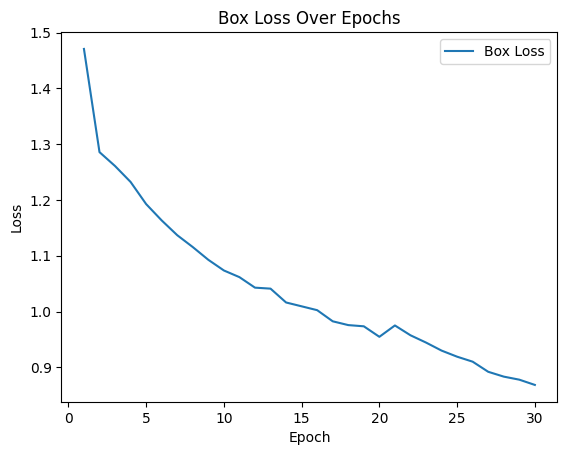

In [14]:
plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss Over Epochs')
plt.legend()
plt.show()


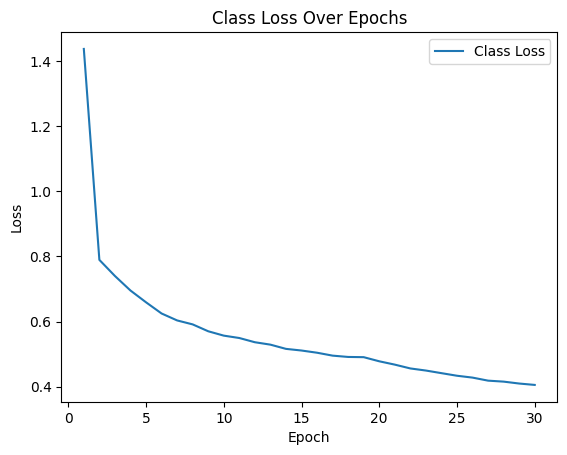

In [15]:
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Class Loss Over Epochs')
plt.legend()
plt.show()


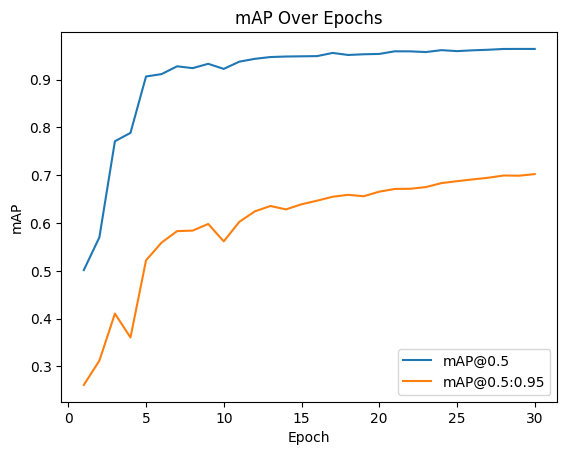

In [16]:
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP Over Epochs')
plt.legend()
plt.show()


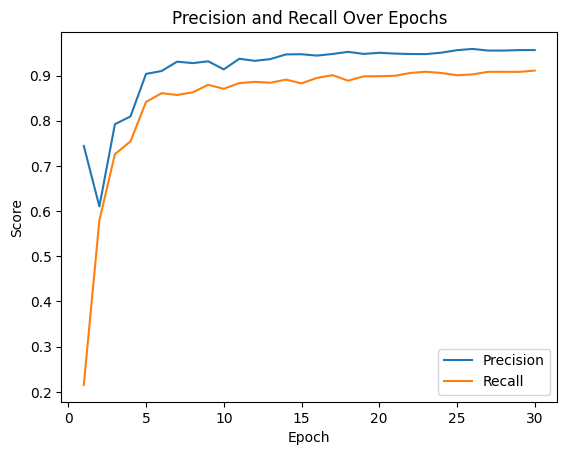

In [17]:
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall Over Epochs')
plt.legend()
plt.show()


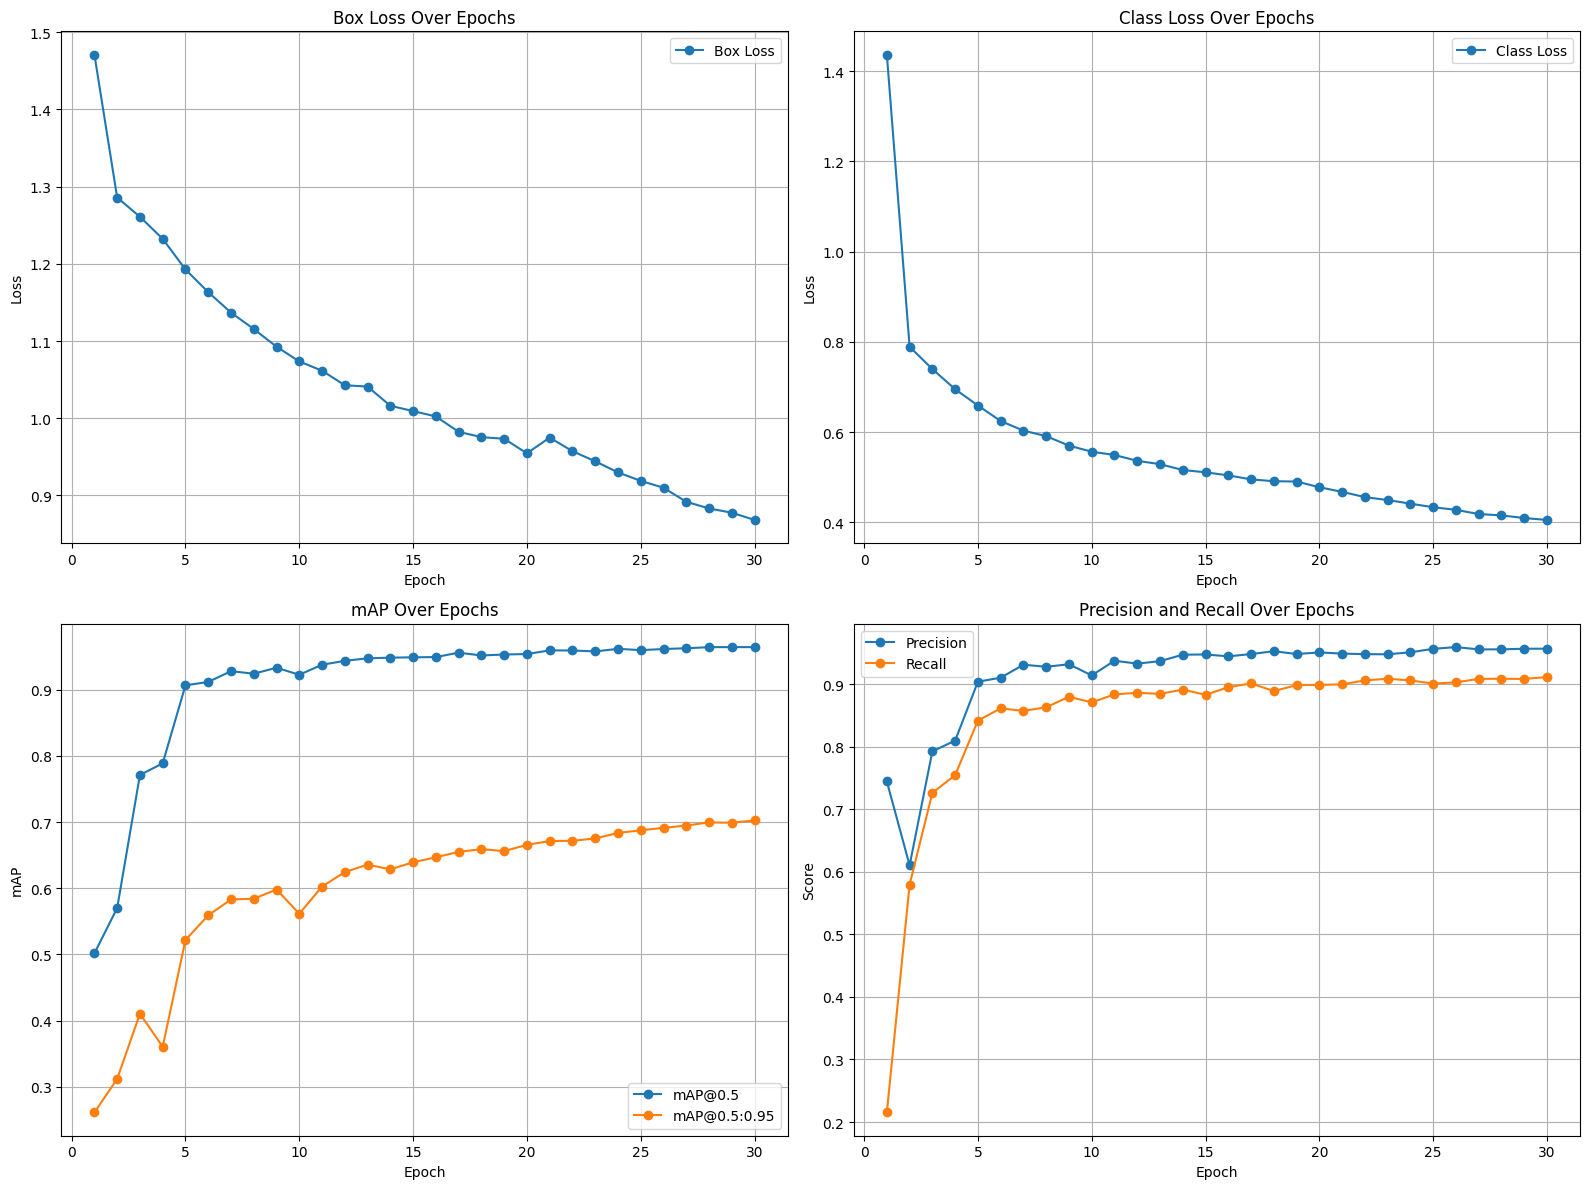

In [18]:

plt.figure(figsize=(16, 12))

# ================== 1. Box Loss ==================
plt.subplot(2, 2, 1)
plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Box Loss Over Epochs')
plt.legend()
plt.grid(True)

# ================== 2. Class Loss ==================
plt.subplot(2, 2, 2)
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Class Loss Over Epochs')
plt.legend()
plt.grid(True)

# ================== 3. mAP ==================
plt.subplot(2, 2, 3)
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@0.5', marker='o')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', marker='o')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.title('mAP Over Epochs')
plt.legend()
plt.grid(True)

# ================== 4. Precision and Recall ==================
plt.subplot(2, 2, 4)
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision', marker='o')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Confusion Matrix

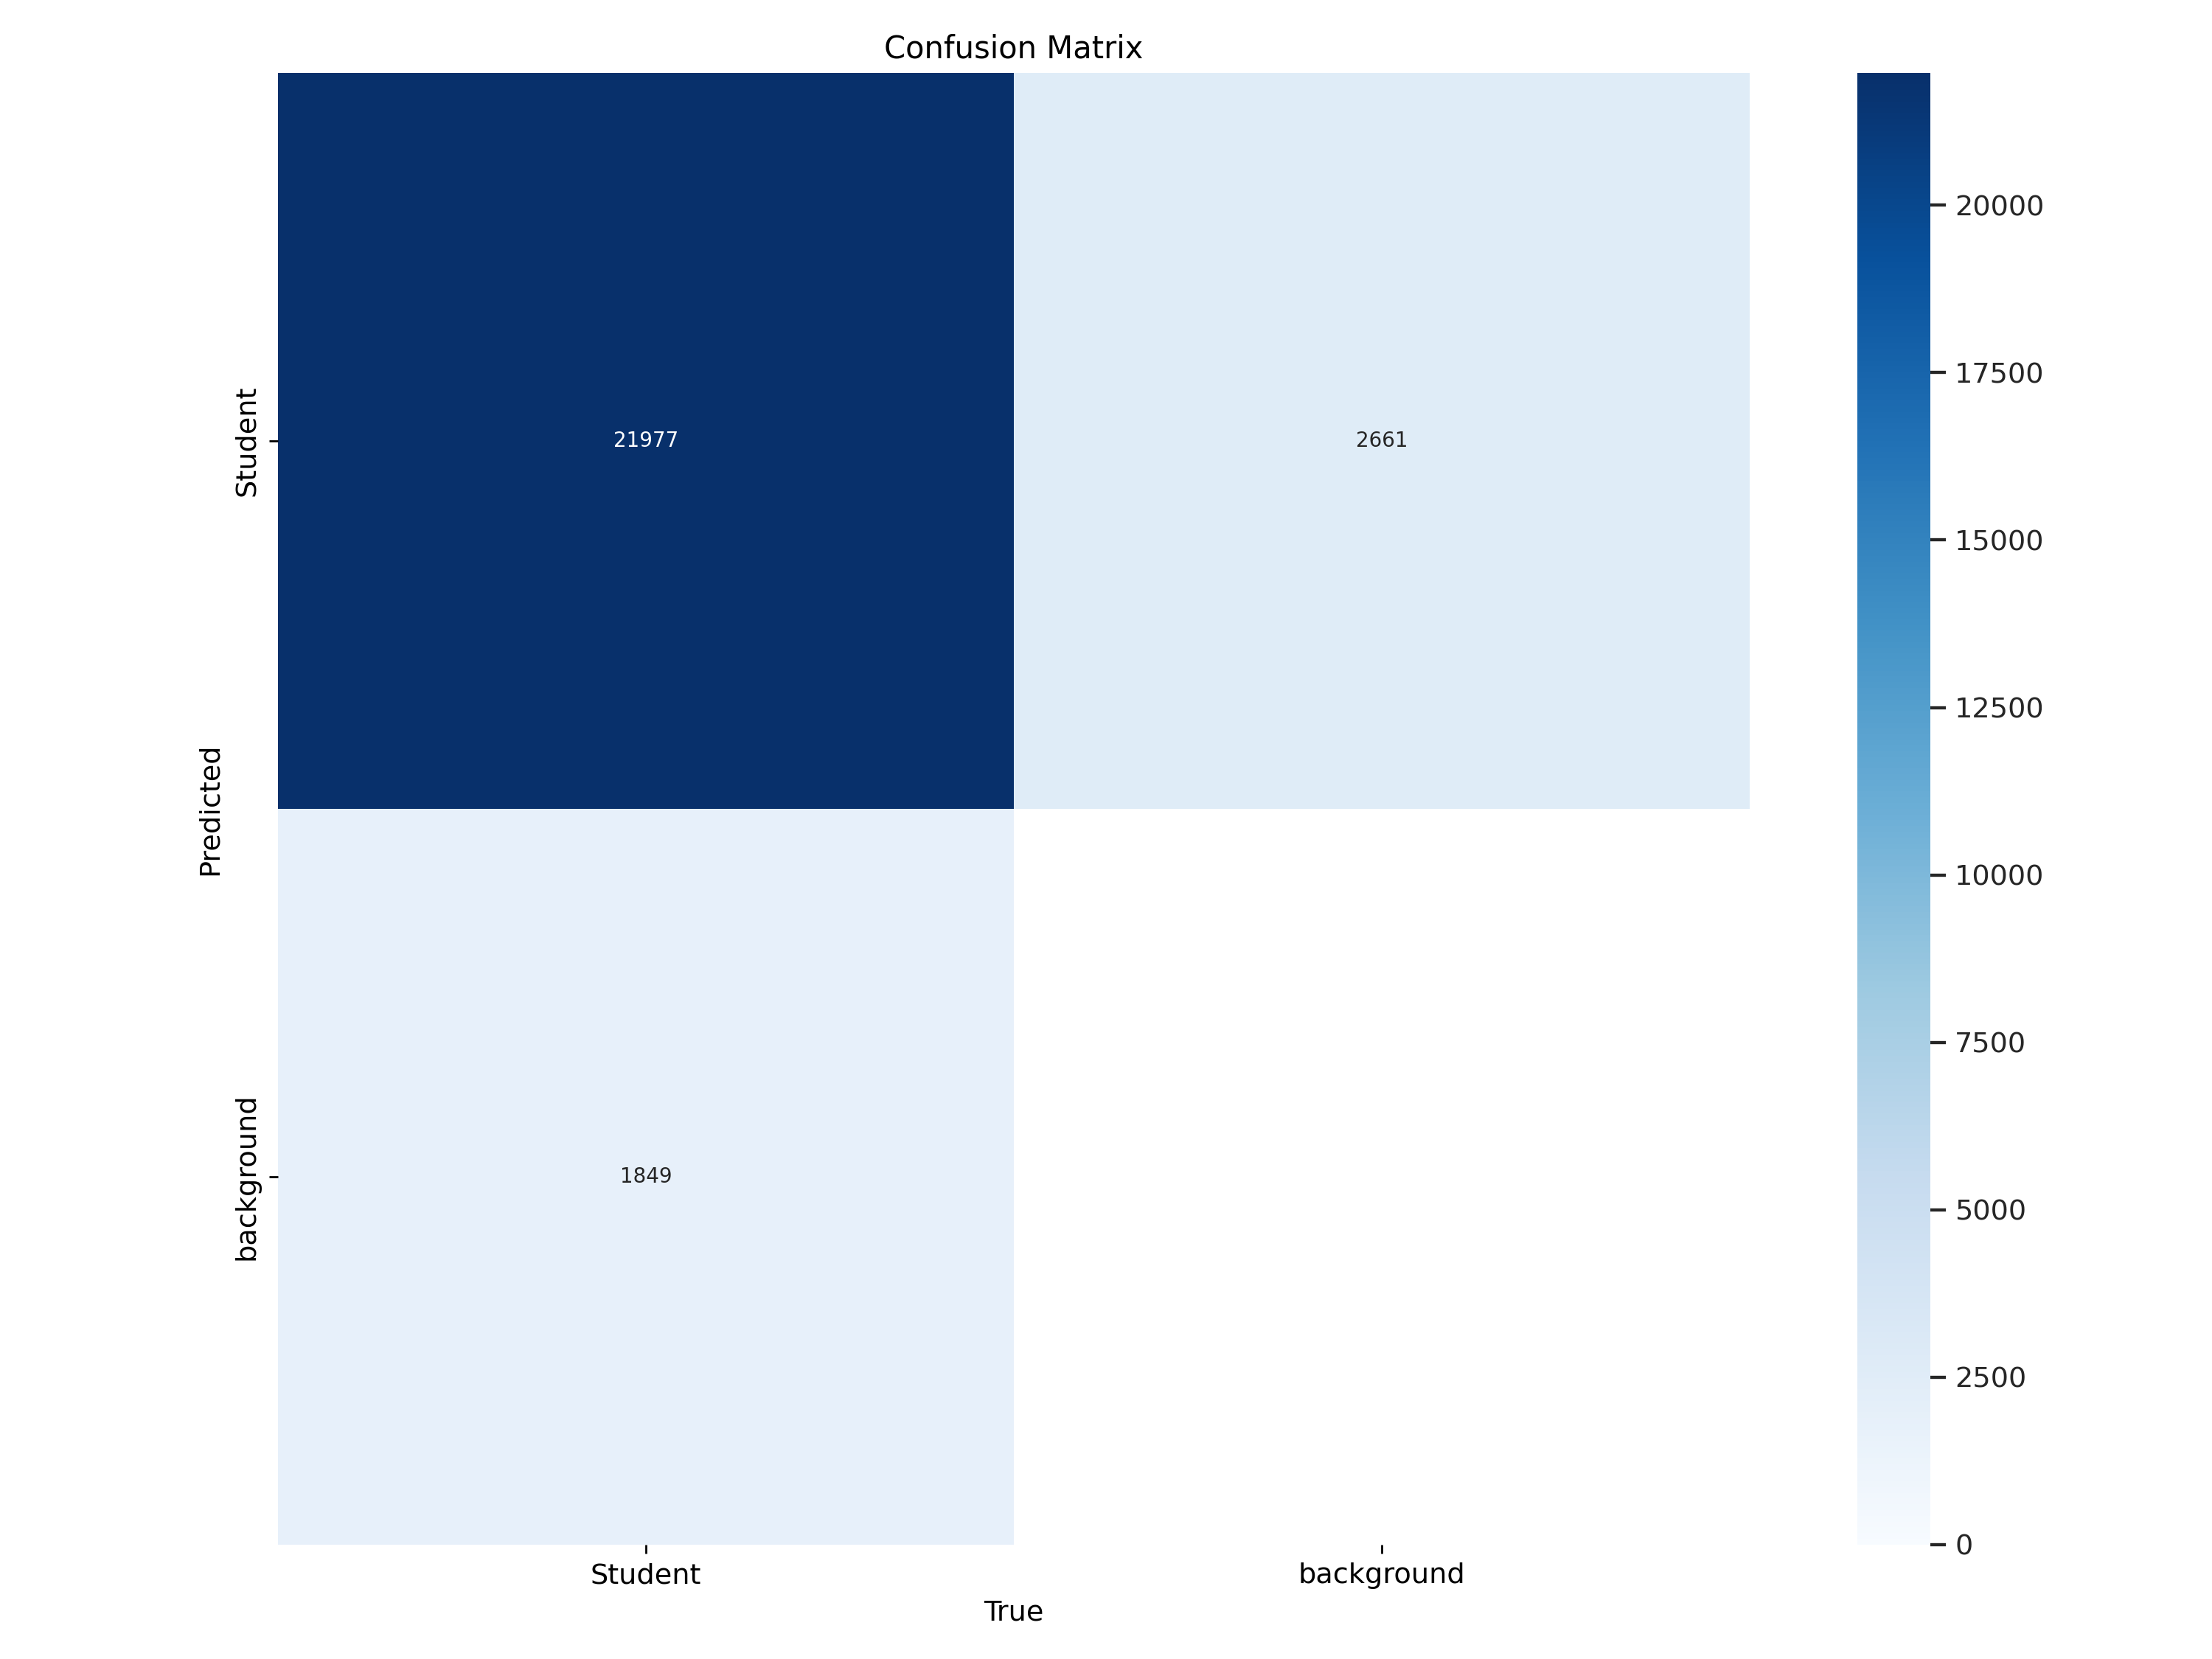

In [19]:
from IPython.display import Image

Image(filename='runs/detect/train3/confusion_matrix.png')


In [34]:
model = YOLO("runs/detect/train13/weights/best.pt")
model.conf = 0.1
cap = cv2.VideoCapture("test/haya.mp4")
ret, frame = cap.read()

H, W = frame.shape[:2]
out = cv2.VideoWriter("output_detected_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'),
                      int(cap.get(cv2.CAP_PROP_FPS)), (W, H))
aux=1
while ret:
    if aux == 10:
        results = model(frame)[0]
        for box in results.boxes.data.tolist():
            x1, y1, x2, y2, conf, class_id = box
            label = model.model.names[int(class_id)]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
            cv2.putText(frame, f"{label} {round(conf,2)}", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
        out.write(frame)
        ret, frame = cap.read()
        aux=0
    else:
        aux = aux + 1 
cap.release()
out.release()


0: 576x992 (no detections), 9.5ms
Speed: 3.6ms preprocess, 9.5ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 4.4ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 3.1ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 3.5ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 3.2ms preprocess, 8.9ms inference, 0.8ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 3.3ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.9ms
Speed: 3.1ms preprocess, 8.9ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 992)

0: 576x992 (no detections), 8.8ms
Speed: 3.0ms preprocess, 8.8ms inference, 1.5ms 

In [21]:
model1 = model.save("student_detection.keras")